In [21]:
# For i factories and j demand points, knowing capacity of each factories and the demand how much should we
#produce in each factories to minimize the cost of trransportation?

#min(x) J = sum_over_i (x(i,j)*D(i,j)) +  sum_over_j(c(i) * x(i,j))
#such that:
#          S_min(i) <= sum_over_j (x(i,j)) <= S_max (i)
#          for all j: sum_over_i (x(i,j)) >= Demand(j)

In [11]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
import random

In [22]:
model = AbstractModel()
model.i = Set()
model.j = Set()
model.Demand = Param(model.j)
model.pmin = Param(model.i)
model.pmax = Param(model.i)
model.Cost = Param(model.i)

model.distance = Param(model.i, model.j, within=Reals)

model.x = Var(model.i, model.j, bounds=(0,300), within=Reals)
model.OF = Var(within=Reals)

def Pbounds(model, i):
    return (model.pmin[i], model.pmax[i])
model.P = Var(model.i, bounds=Pbounds, domain=Reals)

def rule_C1(model,i):
    return sum(model.x[i,j] for j in model.j) == model.P[i]
model.C1 = Constraint(model.i, rule=rule_C1)

def rule_C2(model,j):
    return sum(model.x[i,j] for i in model.i) >= model.Demand[j]
model.C2 = Constraint(model.j, rule=rule_C2)

def rule_OF(model):
    return model.OF == sum(model.P[i]*model.Cost[i] for i in model.i) + sum(model.x[i,j]*model.distance[i,j] for i in model.i for j in model.j)
model.C3 = Constraint(rule=rule_OF)
model.obj1 = Objective(expr=model.OF, sense=minimize)

In [23]:
opt = SolverFactory('glpk')
#parameters defined for i,j and distance
instance = model.create_instance("TransportationProblem.dat")
results = opt.solve(instance) #solves and updates instance
print('OF= ',value(instance.OF))

OF=  10730.0


In [18]:
for i in instance.i:
    print(value(instance.P[i]), value(instance.pmin[i]),value(instance.pmax[i]))
    for j in instance.j:
        print((i,j), value(instance.x[i,j]))

300.0 0 900
(1, 1) 0.0
(1, 2) 0.0
(1, 3) 300.0
(1, 4) 0.0
620.0 10 850
(2, 1) 210.0
(2, 2) 170.0
(2, 3) 120.0
(2, 4) 120.0
20.0 20 750
(3, 1) 0.0
(3, 2) 20.0
(3, 3) 0.0
(3, 4) 0.0


(0.06, 0.9400000000000001, 0.06, 0.9400000000000001)

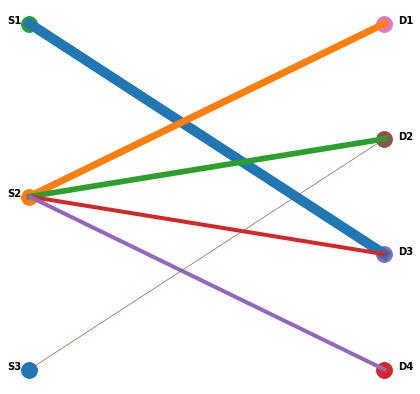

In [24]:
fig = plt.figure(figsize=(7,7))
Ni = 3
Nj = 4
supplyY = np.linspace(0.1, 0.9, Ni)
supplyX = 0.1*np.ones_like(supplyY)
demandY = np.linspace(0.1, 0.9, Nj)
demandX = 0.9 * np.ones_like(demandY)

for i in instance.i:
    for j in instance.j:
        if value(instance.x[i,j]) > 0.1:
            plt.plot([supplyX[Ni-i],demandX[Nj-j]],[supplyY[Ni-i],demandY[Nj-j]],lw=value(instance.x[i,j])/30)
for c in range(0,Ni):
    plt.scatter(supplyX[c],supplyY[c],s=250)
    plt.text(supplyX[Ni-c-1]-0.05,supplyY[Ni-c-1],'S'+str(c+1),fontweight='bold')
for c in range(0,Nj):
    plt.scatter(demandX[c], demandY[c],s=250)
    plt.text(demandX[Nj-c-1]+0.03, demandY[Nj-c-1],'D'+str(c+1),fontweight='bold')
plt.axis('off')